C:\Users\Zyra\AppData\Local\Temp\ipykernel_28032\3676556614.py:4: DtypeWarning: Columns (17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/MP_queried_data_featurized_w_additional_acr_ae_en_stability_label.csv")


number
1      14991
14      9934
225     9118
2       9076
62      6464
12      5519
15      4845
123     3891
194     3665
8       3506
Name: count, dtype: int64


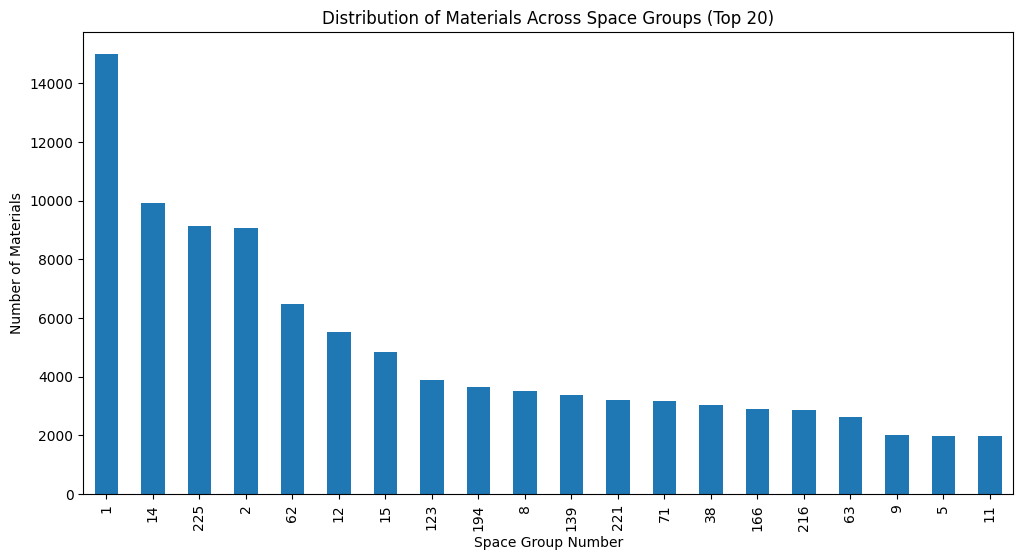

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data/MP_queried_data_featurized_w_additional_acr_ae_en_stability_label.csv")

# Count materials per space group
spacegroup_counts = df['number'].value_counts().sort_values(ascending=False)

# Display top 10 most common
print(spacegroup_counts.head(10))

# Bar plot for the top 20 space groups
plt.figure(figsize=(12,6))
spacegroup_counts.head(20).plot(kind='bar')
plt.xlabel("Space Group Number")
plt.ylabel("Number of Materials")
plt.title("Distribution of Materials Across Space Groups (Top 20)")
plt.show()


C:\Users\Zyra\AppData\Local\Temp\ipykernel_28032\3799735448.py:8: DtypeWarning: Columns (17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/MP_queried_data_featurized_w_additional_acr_ae_en_stability_label.csv")


Top 10 most common space groups:
number
1      14991
14      9934
225     9118
2       9076
62      6464
12      5519
15      4845
123     3891
194     3665
8       3506
Name: count, dtype: int64

Number of rare space groups (<100 samples): 109
Number of common space groups (≥100 samples): 119


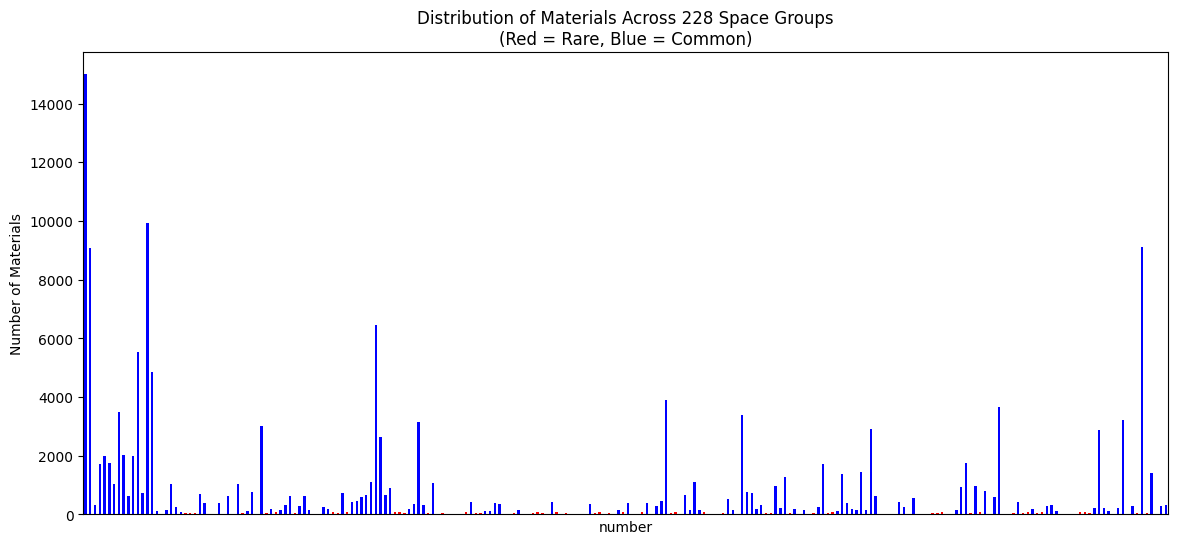


Sample class weights for PyTorch (first 20 classes):
SG 0: weight = 0.0003
SG 1: weight = 0.0007
SG 2: weight = 0.0019
SG 3: weight = 0.0017
SG 4: weight = 0.0016
SG 5: weight = 0.0001
SG 6: weight = 0.0002
SG 7: weight = 0.0174
SG 8: weight = 0.0032
SG 9: weight = 0.0002
SG 10: weight = 0.0027
SG 11: weight = 0.0001
SG 12: weight = 0.0023
SG 13: weight = 0.0001
SG 14: weight = 0.0014
SG 15: weight = 0.0005
SG 16: weight = 0.0001
SG 17: weight = 0.0028
SG 18: weight = 0.0000
SG 19: weight = 0.0019
SG 20: weight = 0.0004
SG 21: weight = 0.0008
SG 22: weight = 0.0004
SG 23: weight = 0.0002
SG 24: weight = 0.0001
SG 25: weight = 0.0018
SG 26: weight = 0.0002
SG 27: weight = 0.0001
SG 28: weight = 0.0004
SG 29: weight = 0.0044
SG 30: weight = 0.0087
SG 31: weight = 0.0003
SG 32: weight = 0.0004
SG 33: weight = 0.0010
SG 34: weight = 0.0016
SG 35: weight = 0.0001
SG 36: weight = 0.0007
SG 37: weight = 0.0002
SG 38: weight = 0.0002
SG 39: weight = 0.0001
SG 40: weight = 0.0001
SG 41: weight

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import torch

# -------------------------------
# Load data
# -------------------------------
df = pd.read_csv("data/MP_queried_data_featurized_w_additional_acr_ae_en_stability_label.csv")

# Ensure 'number' column exists (space group number)
if 'number' not in df.columns:
    raise ValueError("Column 'number' not found in CSV.")

# -------------------------------
# Analyze distribution
# -------------------------------
spacegroup_counts = df['number'].value_counts().sort_index()  # sorted by SG number

print("Top 10 most common space groups:")
print(spacegroup_counts.sort_values(ascending=False).head(10))

# Define rare threshold (e.g., groups with <10 materials)
rare_threshold = 100
rare_groups = spacegroup_counts[spacegroup_counts < rare_threshold]
common_groups = spacegroup_counts[spacegroup_counts >= rare_threshold]

print(f"\nNumber of rare space groups (<{rare_threshold} samples): {len(rare_groups)}")
print(f"Number of common space groups (≥{rare_threshold} samples): {len(common_groups)}")

# -------------------------------
# Plot distribution
# -------------------------------
plt.figure(figsize=(14,6))
colors = ['red' if x < rare_threshold else 'blue' for x in spacegroup_counts]
spacegroup_counts.plot(kind='bar', color=colors)

plt.xticks([])  # hide x-axis labels
plt.ylabel("Number of Materials")
plt.title("Distribution of Materials Across 228 Space Groups\n(Red = Rare, Blue = Common)")
plt.show()

# -------------------------------
# Compute class weights for PyTorch
# -------------------------------
sg_labels = torch.tensor(df['number'].values, dtype=torch.long)
class_counts = torch.bincount(sg_labels)
# Avoid division by zero
class_counts = torch.where(class_counts == 0, torch.tensor(1), class_counts)
weights = 1.0 / class_counts.float()
weights = weights / weights.sum()  # normalize to sum=1

print("\nSample class weights for PyTorch (first 20 classes):")
for i, w in enumerate(weights[20:]):
    print(f"SG {i}: weight = {w.item():.4f}")


C:\Users\Zyra\AppData\Local\Temp\ipykernel_28032\3788333845.py:8: DtypeWarning: Columns (17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/MP_queried_data_featurized_w_additional_acr_ae_en_stability_label.csv")


Top 10 most common space groups:
number
1      14991
14      9934
225     9118
2       9076
62      6464
12      5519
15      4845
123     3891
194     3665
8       3506
Name: count, dtype: int64

Mean number of materials per space group: 672.06
Median number of materials per space group: 119.5


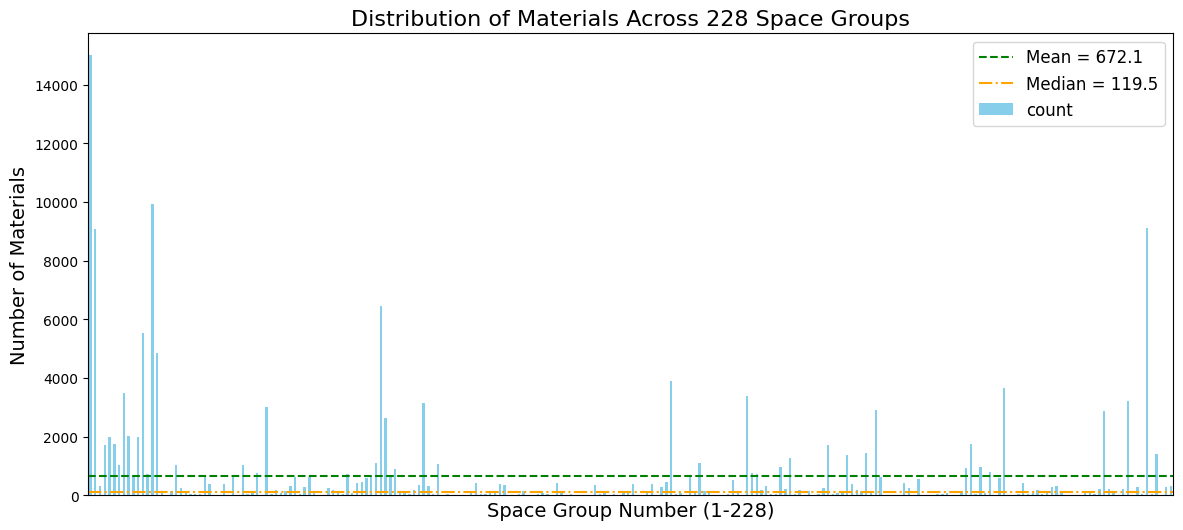


Sample class weights for PyTorch (first 20 classes):
SG 0: weight = 0.0698
SG 1: weight = 0.0000
SG 2: weight = 0.0000
SG 3: weight = 0.0002
SG 4: weight = 0.0000
SG 5: weight = 0.0000
SG 6: weight = 0.0000
SG 7: weight = 0.0001
SG 8: weight = 0.0000
SG 9: weight = 0.0000
SG 10: weight = 0.0001
SG 11: weight = 0.0000
SG 12: weight = 0.0000
SG 13: weight = 0.0001
SG 14: weight = 0.0000
SG 15: weight = 0.0000
SG 16: weight = 0.0006
SG 17: weight = 0.0024
SG 18: weight = 0.0005
SG 19: weight = 0.0001


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import torch

# -------------------------------
# Load data
# -------------------------------
df = pd.read_csv("data/MP_queried_data_featurized_w_additional_acr_ae_en_stability_label.csv")

# Ensure 'number' column exists (space group number)
if 'number' not in df.columns:
    raise ValueError("Column 'number' not found in CSV.")

# -------------------------------
# Analyze distribution
# -------------------------------
spacegroup_counts = df['number'].value_counts().sort_index()  # sorted by SG number

print("Top 10 most common space groups:")
print(spacegroup_counts.sort_values(ascending=False).head(10))

# Compute mean and median
mean_count = spacegroup_counts.mean()
median_count = spacegroup_counts.median()
print(f"\nMean number of materials per space group: {mean_count:.2f}")
print(f"Median number of materials per space group: {median_count}")

# -------------------------------
# Plot distribution
# -------------------------------
plt.figure(figsize=(14,6))
spacegroup_counts.plot(kind='bar', color='skyblue')  # single color

plt.xticks([])  # hide x-axis labels
plt.ylabel("Number of Materials", fontsize=14)
plt.xlabel("Space Group Number (1-228)", fontsize=14)
plt.title("Distribution of Materials Across 228 Space Groups", fontsize=16)

# Add mean and median lines
plt.axhline(mean_count, color='green', linestyle='--', label=f"Mean = {mean_count:.1f}")
plt.axhline(median_count, color='orange', linestyle='-.', label=f"Median = {median_count:.1f}")
plt.legend(fontsize=12)
plt.show()

# -------------------------------
# Compute class weights for PyTorch
# -------------------------------
sg_labels = torch.tensor(df['number'].values, dtype=torch.long)
class_counts = torch.bincount(sg_labels)
# Avoid division by zero
class_counts = torch.where(class_counts == 0, torch.tensor(1), class_counts)
weights = 1.0 / class_counts.float()
weights = weights / weights.sum()  # normalize to sum=1

print("\nSample class weights for PyTorch (first 20 classes):")
for i, w in enumerate(weights[:20]):
    print(f"SG {i}: weight = {w.item():.4f}")


In [13]:
# -------------------------------
# Top 3 most common symbols
# -------------------------------
top_symbols = df['symbol'].value_counts().head(3)
print("Top 3 most common symbols:")
print(top_symbols)


Top 3 most common symbols:
symbol
P1        14991
P2_1/c     9934
Fm-3m      9118
Name: count, dtype: int64
